[ 64.543673   169.66289646]
[114.48023777 231.47181165]
[[115.05551535 126.90226283]
 [126.90226283 232.63498658]]
[[1.         0.77567203]
 [0.77567203 1.        ]]


/var/folders/ck/0nwhvwjn3kb593xmnwkkg2y00000gp/T/ipykernel_5247/1374014284.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dframe,x='poids',y='taille', shade = True, cmap = "cool", bw_adjust=2)


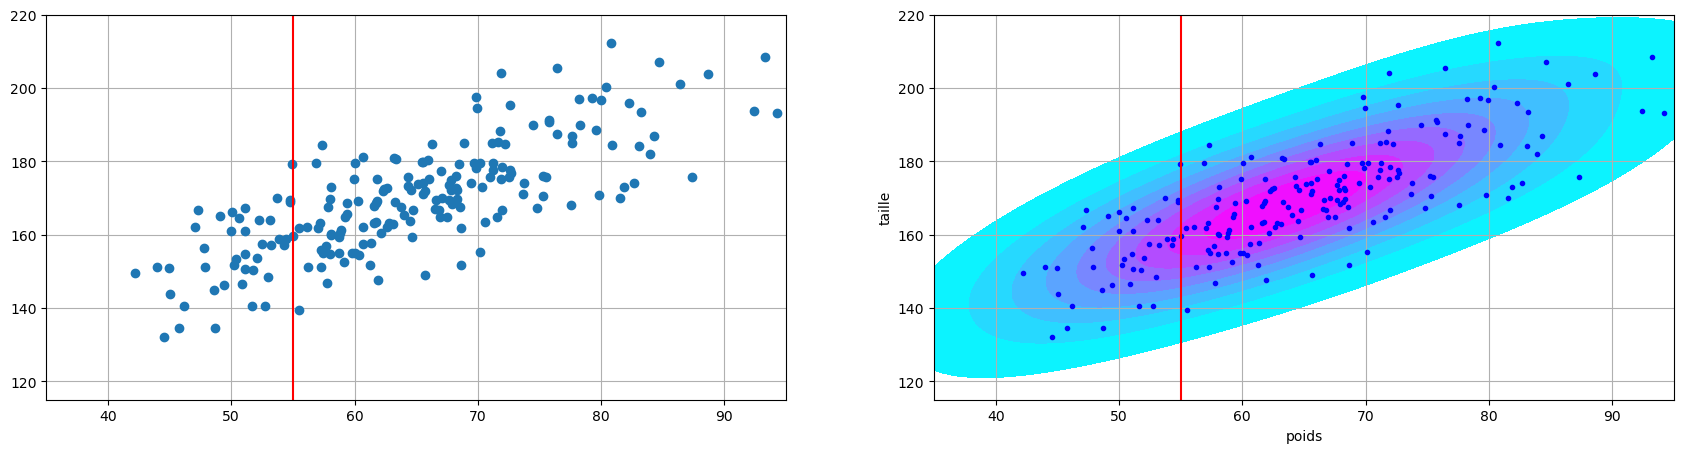

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mu = np.array([64, 170]) # mean and standard deviation
sx = 10
sy = 15
sxy = 0.75*(sx*sy)
Sig = np.array([[sx**2, sxy],[sxy, sy**2]])
n = 200
X0 = np.random.normal(size = (n,2))
X = X0@np.linalg.cholesky(Sig).T + np.outer(np.ones(n),mu)

print(np.mean(X, axis=0))
print(np.std(X, axis=0)**2)
print(np.cov(X.T))
print(np.corrcoef(X.T))

plt.figure(figsize=(9 * 2 + 3, 5))
plt.subplot(1,2,1)
plt.plot(X[:,0],X[:,1],'o')
plt.plot([55, 55],[115, 220],'r')
plt.grid()
plt.xlim(35, 95)
plt.ylim(115, 220)
plt.subplot(1,2,2)
dframe = pd.DataFrame(X,columns=['poids','taille'])
sns.kdeplot(data=dframe,x='poids',y='taille', shade = True, cmap = "cool", bw_adjust=2)
plt.plot(X[:,0],X[:,1],'.b')
plt.plot([55, 55],[115, 220],'r')
plt.grid()
plt.xlim(35, 95)
plt.ylim(115, 220)
plt.show()

[ 64.543673   169.66289646]
[114.48023777 231.47181165]
[[115.05551535 126.90226283]
 [126.90226283 232.63498658]]
[[1.         0.77567203]
 [0.77567203 1.        ]]


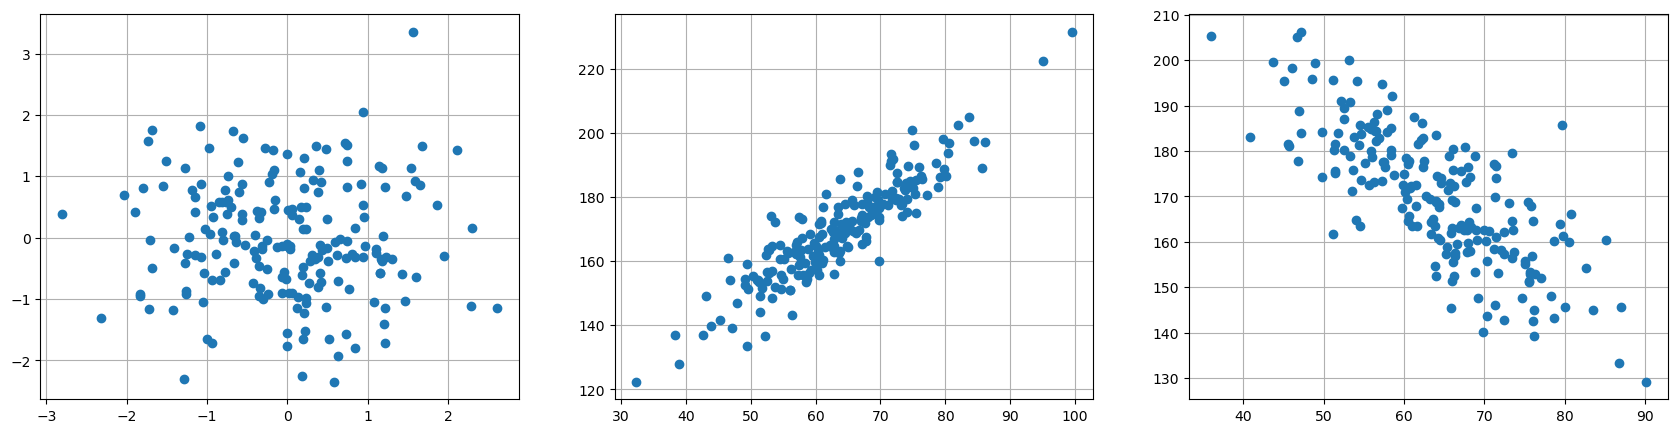

In [2]:
mu = np.array([64, 170]) # mean and standard deviation
sx = 10
sy = 15
sxy = 0.9*(sx*sy)
Sig = np.array([[sx**2, sxy],[sxy, sy**2]])
n = 200
X0 = np.random.normal(size = (n,2))
X1 = X0@np.linalg.cholesky(Sig).T + np.outer(np.ones(n),mu)

print(np.mean(X, axis=0))
print(np.std(X, axis=0)**2)
print(np.cov(X.T))
print(np.corrcoef(X.T))

sxy = -0.75*(sx*sy)
Sig = np.array([[sx**2, sxy],[sxy, sy**2]])
n = 200
X0 = np.random.normal(size = (n,2))
X2 = X0@np.linalg.cholesky(Sig).T + np.outer(np.ones(n),mu)

plt.figure(figsize=(9 * 2 + 3, 5))
plt.subplot(1,3,1)
plt.plot(X0[:,0],X0[:,1],'o')
plt.grid()
plt.subplot(1,3,2)
plt.plot(X1[:,0],X1[:,1],'o')
plt.grid()
plt.subplot(1,3,3)
plt.plot(X2[:,0],X2[:,1],'o')
plt.grid()
plt.show()

/Users/stephane/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


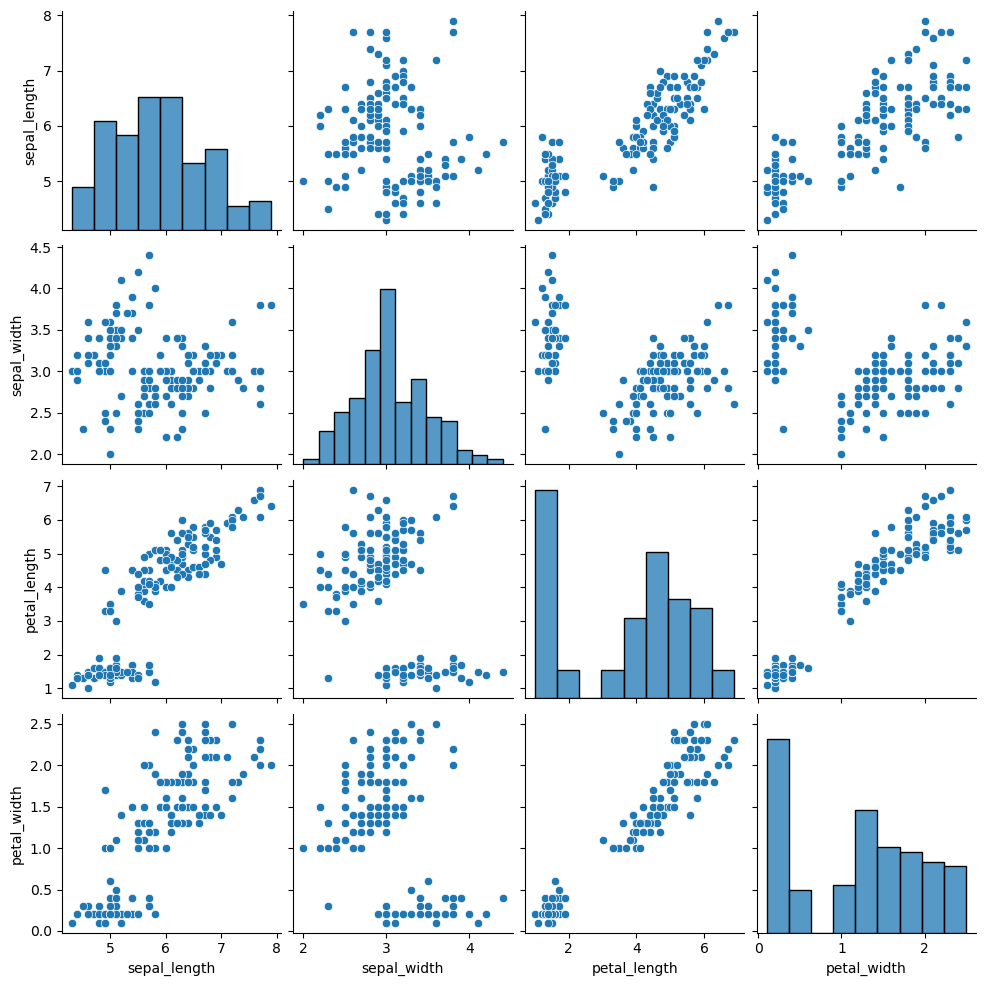

In [3]:
# https://jishuin.proginn.com/p/763bfbd660a0
import seaborn as sns

df = sns.load_dataset('iris', data_home='seaborn-data', cache=True)

sns.pairplot(df)
plt.show()

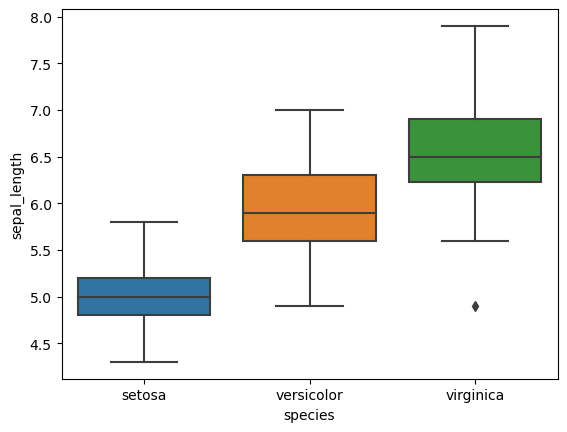

In [4]:
sns.boxplot(x=df["species"], y=df["sepal_length"])
plt.show()

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

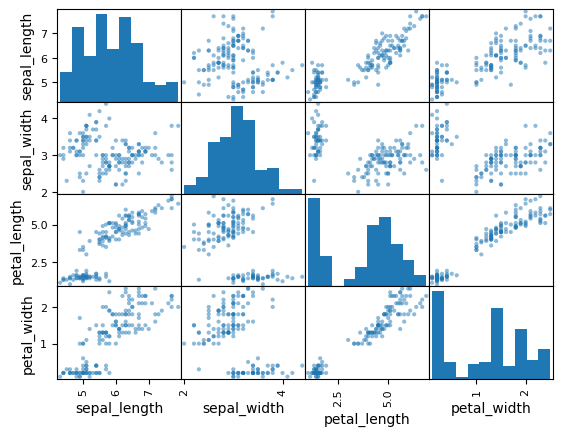

In [5]:
from pandas.plotting import scatter_matrix

scatter_matrix(df)

In [10]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

## PCA of the data

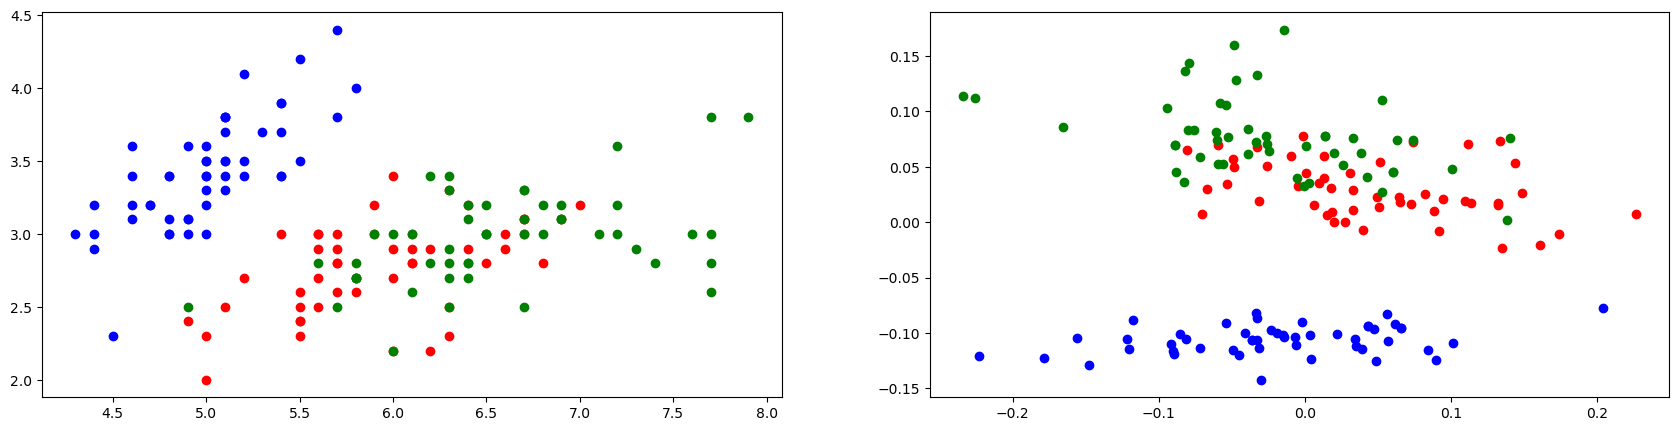

In [56]:
from scipy.sparse.linalg import svds 
from sklearn import preprocessing

Y = df.values
t = Y[:,4]
Y = Y[:,0:3].astype(float)
m = Y.mean(axis=0)
st = Y.std(axis=0)
Yc = (Y-m)/st                               # depend de la nature de Y ici quantitatif
#Y = Y[:,0:3].astype(float)                  # depend de la nature de Y ici quantitatif
d = 2                                       # taille de la representation
U, S, Vt = svds(Yc, k=d) 
Vt = np.diag(S)@Vt                          # ou U = U*S

ind_s = np.where(t =='setosa')
ind_v = np.where(t =='versicolor')
ind_a = np.where(t =='virginica')
plt.figure(figsize=(9 * 2 + 3, 5))
plt.subplot(1,2,1)
plt.plot(Y[ind_s,0],Y[ind_s,1],'ob')
plt.plot(Y[ind_v,0],Y[ind_v,1],'or')
plt.plot(Y[ind_a,0],Y[ind_a,1],'og')
plt.subplot(1,2,2)
plt.plot(U[ind_s,0],U[ind_s,1],'ob')
plt.plot(U[ind_v,0],U[ind_v,1],'or')
plt.plot(U[ind_a,0],U[ind_a,1],'og')

plt.show() 

In [57]:
plt.plot(U[ind_s,0],U[ind_s,2],'ob')
plt.plot(U[ind_v,0],U[ind_v,2],'or')
plt.plot(U[ind_a,0],U[ind_a,2],'og')

IndexError: index 2 is out of bounds for axis 1 with size 2